In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from prophet import Prophet

In [3]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
mensual = pd.read_csv('mensual_ext.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

# Mensuales

In [7]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133


In [8]:
mensual_p = mensual['n_trips']

In [9]:
mensual_p

,n_trips
pickup_datetime,
2022-03-31,3075023
2022-04-30,3004149
2022-05-31,2926385
2022-06-30,2917367
2022-07-31,2627194
2022-08-31,2600258
2022-09-30,2552011
2022-10-31,2975223
2022-11-30,2639133


In [10]:
mensual_p = mensual_p.reset_index()

In [11]:
mensual_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
mensual_p

,ds,y
0,2022-03-31,3075023
1,2022-04-30,3004149
2,2022-05-31,2926385
3,2022-06-30,2917367
4,2022-07-31,2627194
5,2022-08-31,2600258
6,2022-09-30,2552011
7,2022-10-31,2975223
8,2022-11-30,2639133
9,2022-12-31,2729661


## Modelo

In [24]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(yearly_seasonality= True, uncertainty_samples = 1000, mcmc_samples=100, interval_width= 0.7, seasonality_prior_scale=1,changepoint_prior_scale =0.06)

# Entrenamos el modelo
prophet_1.fit(mensual_p)

mape = 0.05
cov = 1
n = 12
while mape < 0.08 and cov > 0.9:
  mape_pre = mape
  cov_pre = cov
  forecast_pre = forecast_1
  df_cv_pre = df_cv_1
  df_p_pre = df_p_1
  build_forecast = prophet_1.make_future_dataframe(periods=n, freq='M') #
  forecast_1 = prophet_1.predict(build_forecast)
  df_cv_1 = cross_validation(prophet_1, initial = '365 days', horizon = '365 days')
  df_p_1 = performance_metrics(df_cv_1)
  mape = df_p_1.mape.mean()
  cov = df_p_1.coverage.mean()
  n += 6

print('Prediccion de hasta', (n-6)/12, 'años')
print('El mape es:', mape_pre)
print('El coverage es:', cov_pre)

forecast_pre

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/xu5fjfg7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/bnpyqctc.json
03:00:58 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=19003', 'data', 'file=/tmp/tmpo1459kda/xu5fjfg7.json', 'init=/tmp/tmpo1459kda/bnpyqctc.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelpqo00f_5/prophet_model-20241119030058_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=19003', 'data', 'file=/tmp/tmpo1459kda/xu5fjfg7.json', 'init=/tmp/tmpo1459kda/bnpyqctc.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelpqo00f_5/prophet_model-20241119030058_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:00:59 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=19003', 'data', 'file=/tmp/tmpo1459kda/xu5fjfg7.json', 'init=/tmp/tmpo1459kda/bnpyqctc.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelpqo00f_5/prophet_model-20241119030058_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpo1459kda/prophet_modelpqo00f_5/prophet_model-20241119030058_1.csv
 console_msgs (if any):
	/tmp/tmpo1459kda/prophet_modelpqo00f_5/prophet_model-20241119030058_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/0_xw2di_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/y9vld2ks.json
03:01:00 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=70632', 'data', 'file=/tmp/tmpo1459kda/0_xw2di_.json', 'init=/tmp/tmpo1459kda/y9vld2ks.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelqyh06wrk/prophet_model-20241119030100_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=70632', 'data', 'file=/tmp/tmpo1459kda/0_xw2di_.json', 'init=/tmp/tmpo1459kda/y9vld2ks.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelqyh06wrk/prophet_model-20241119030100_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:01:02 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=70632', 'data', 'file=/tmp/tmpo1459kda/0_xw2di_.json', 'init=/tmp/tmpo1459kda/y9vld2ks.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelqyh06wrk/prophet_model-20241119030100_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpo1459kda/prophet_modelqyh06wrk/prophet_model-20241119030100_1.csv
 console_msgs (if any):
	/tmp/tmpo1459kda/prophet_modelqyh06wrk/prophet_model-20241119030100_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/wf0npnsj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/vbztdkuo.json
03:01:03 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=10820', 'data', 'file=/tmp/tmpo1459kda/wf0npnsj.json', 'init=/tmp/tmpo1459kda/vbztdkuo.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelssil4mox/prophet_model-20241119030103_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=10820', 'data', 'file=/tmp/tmpo1459kda/wf0npnsj.json', 'init=/tmp/tmpo1459kda/vbztdkuo.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelssil4mox/prophet_model-20241119030103_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:01:06 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=10820', 'data', 'file=/tmp/tmpo1459kda/wf0npnsj.json', 'init=/tmp/tmpo1459kda/vbztdkuo.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelssil4mox/prophet_model-20241119030103_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpo1459kda/prophet_modelssil4mox/prophet_model-20241119030103_1.csv
 console_msgs (if any):
	/tmp/tmpo1459kda/prophet_modelssil4mox/prophet_model-20241119030103_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/ggxpalxf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/c3adnreq.json
03:01:07 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=56307', 'data', 'file=/tmp/tmpo1459kda/ggxpalxf.json', 'init=/tmp/tmpo1459kda/c3adnreq.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelqt3hgi7x/prophet_model-20241119030107_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=56307', 'data', 'file=/tmp/tmpo1459kda/ggxpalxf.json', 'init=/tmp/tmpo1459kda/c3adnreq.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelqt3hgi7x/prophet_model-20241119030107_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:01:10 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=56307', 'data', 'file=/tmp/tmpo1459kda/ggxpalxf.json', 'init=/tmp/tmpo1459kda/c3adnreq.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelqt3hgi7x/prophet_model-20241119030107_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpo1459kda/prophet_modelqt3hgi7x/prophet_model-20241119030107_1.csv
 console_msgs (if any):
	/tmp/tmpo1459kda/prophet_modelqt3hgi7x/prophet_model-20241119030107_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/y96al67g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/sm6r_ce5.json
03:01:10 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=30432', 'data', 'file=/tmp/tmpo1459kda/y96al67g.json', 'init=/tmp/tmpo1459kda/sm6r_ce5.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelfzt7i896/prophet_model-20241119030111_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=30432', 'data', 'file=/tmp/tmpo1459kda/y96al67g.json', 'init=/tmp/tmpo1459kda/sm6r_ce5.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelfzt7i896/prophet_model-20241119030111_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:01:13 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=30432', 'data', 'file=/tmp/tmpo1459kda/y96al67g.json', 'init=/tmp/tmpo1459kda/sm6r_ce5.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelfzt7i896/prophet_model-20241119030111_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpo1459kda/prophet_modelfzt7i896/prophet_model-20241119030111_1.csv
 console_msgs (if any):
	/tmp/tmpo1459kda/prophet_modelfzt7i896/prophet_model-20241119030111_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/1nxii178.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/5le0hd_q.json
03:01:14 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=75260', 'data', 'file=/tmp/tmpo1459kda/1nxii178.json', 'init=/tmp/tmpo1459kda/5le0hd_q.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelojg63st3/prophet_model-20241119030114_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=75260', 'data', 'file=/tmp/tmpo1459kda/1nxii178.json', 'init=/tmp/tmpo1459kda/5le0hd_q.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelojg63st3/prophet_model-20241119030114_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:01:16 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=75260', 'data', 'file=/tmp/tmpo1459kda/1nxii178.json', 'init=/tmp/tmpo1459kda/5le0hd_q.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelojg63st3/prophet_model-20241119030114_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpo1459kda/prophet_modelojg63st3/prophet_model-20241119030114_1.csv
 console_msgs (if any):
	/tmp/tmpo1459kda/prophet_modelojg63st3/prophet_model-20241119030114_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/91meqky9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/qr0976vd.json
03:01:17 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=91693', 'data', 'file=/tmp/tmpo1459kda/91meqky9.json', 'init=/tmp/tmpo1459kda/qr0976vd.json', 'output', 'file=/tmp/tmpo1459kda/prophet_model56k4i_ow/prophet_model-20241119030117_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=91693', 'data', 'file=/tmp/tmpo1459kda/91meqky9.json', 'init=/tmp/tmpo1459kda/qr0976vd.json', 'output', 'file=/tmp/tmpo1459kda/prophet_model56k4i_ow/prophet_model-20241119030117_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:01:20 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=91693', 'data', 'file=/tmp/tmpo1459kda/91meqky9.json', 'init=/tmp/tmpo1459kda/qr0976vd.json', 'output', 'file=/tmp/tmpo1459kda/prophet_model56k4i_ow/prophet_model-20241119030117_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpo1459kda/prophet_model56k4i_ow/prophet_model-20241119030117_1.csv
 console_msgs (if any):
	/tmp/tmpo1459kda/prophet_model56k4i_ow/prophet_model-20241119030117_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)



Prediccion de hasta 3.5 años
El mape es: 0.07153649102466743
El coverage es: 0.9166666666666666


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-31,2.836451e+06,2.958150e+06,3.193805e+06,2.768765e+06,2.911295e+06,242873.621600,172277.918656,303853.740038,242873.621600,172277.918656,303853.740038,0.0,0.0,0.0,3.079325e+06
1,2022-04-30,2.821657e+06,2.872197e+06,3.088029e+06,2.755824e+06,2.884394e+06,158601.471886,88238.813473,230028.723843,158601.471886,88238.813473,230028.723843,0.0,0.0,0.0,2.980258e+06
2,2022-05-31,2.806570e+06,2.935096e+06,3.141493e+06,2.751455e+06,2.865811e+06,226156.228085,145571.213259,298641.295930,226156.228085,145571.213259,298641.295930,0.0,0.0,0.0,3.032726e+06
3,2022-06-30,2.792594e+06,2.821857e+06,3.029902e+06,2.734955e+06,2.847610e+06,132423.749062,63730.180361,198544.077319,132423.749062,63730.180361,198544.077319,0.0,0.0,0.0,2.925018e+06
4,2022-07-31,2.778284e+06,2.503162e+06,2.697604e+06,2.720559e+06,2.835283e+06,-181050.571609,-250351.297000,-109924.190243,-181050.571609,-250351.297000,-109924.190243,0.0,0.0,0.0,2.597233e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2027-04-30,3.068221e+06,2.283282e+06,4.144234e+06,2.131548e+06,3.993514e+06,149617.581382,56296.960039,239568.330998,149617.581382,56296.960039,239568.330998,0.0,0.0,0.0,3.217838e+06
62,2027-05-31,3.081351e+06,2.297516e+06,4.286612e+06,2.106218e+06,4.043970e+06,222631.903968,141550.043609,306373.336676,222631.903968,141550.043609,306373.336676,0.0,0.0,0.0,3.303983e+06
63,2027-06-30,3.094058e+06,2.226806e+06,4.257004e+06,2.076129e+06,4.113205e+06,138784.253677,61985.755000,215805.067788,138784.253677,61985.755000,215805.067788,0.0,0.0,0.0,3.232842e+06
64,2027-07-31,3.107188e+06,1.913023e+06,4.047444e+06,2.030779e+06,4.160153e+06,-137913.956012,-213852.147598,-53231.762338,-137913.956012,-213852.147598,-53231.762338,0.0,0.0,0.0,2.969274e+06


In [25]:
print('Prediccion de hasta',n/12, 'años')
print('El mape es:', mape)
print('El coverage es:', cov)

Prediccion de hasta 4.0 años
El mape es: 0.08509597574267404
El coverage es: 0.9166666666666666


In [18]:
forecast_pre.to_csv('forecast_mensual_3.5.csv')

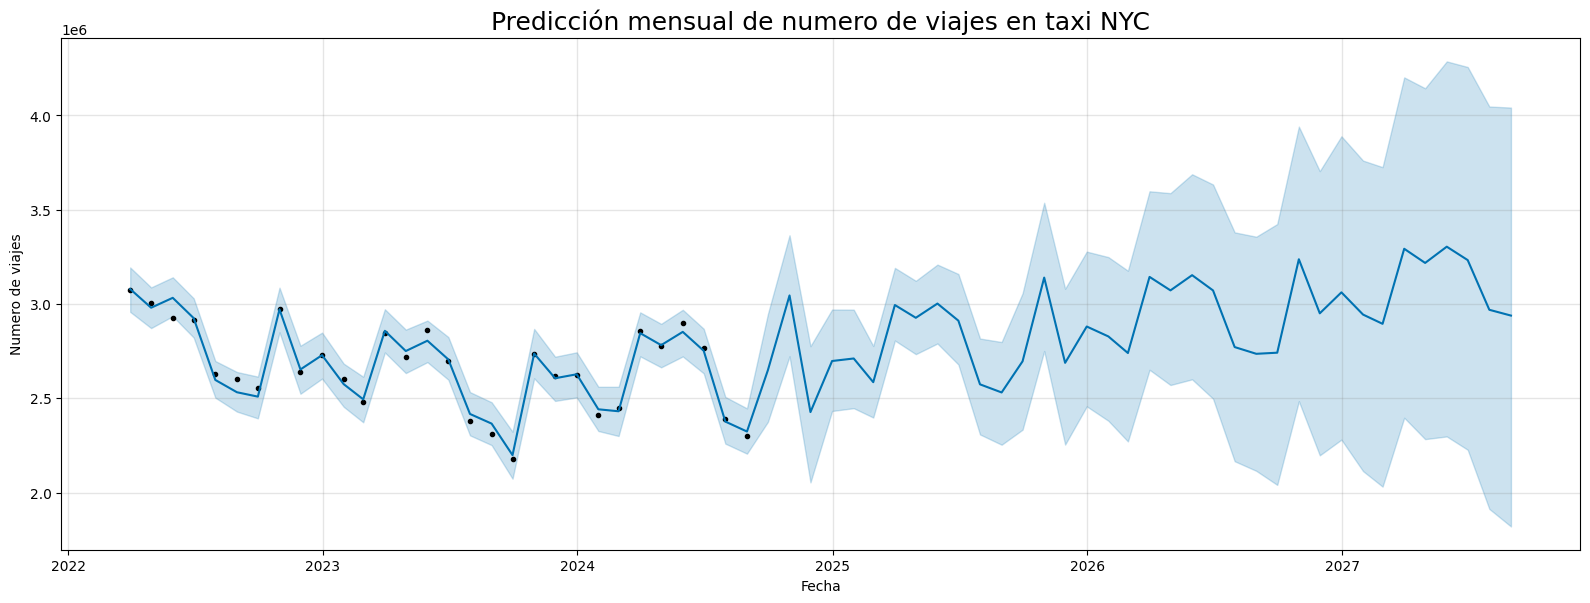

In [26]:
prophet_1.plot(forecast_pre, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción mensual de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

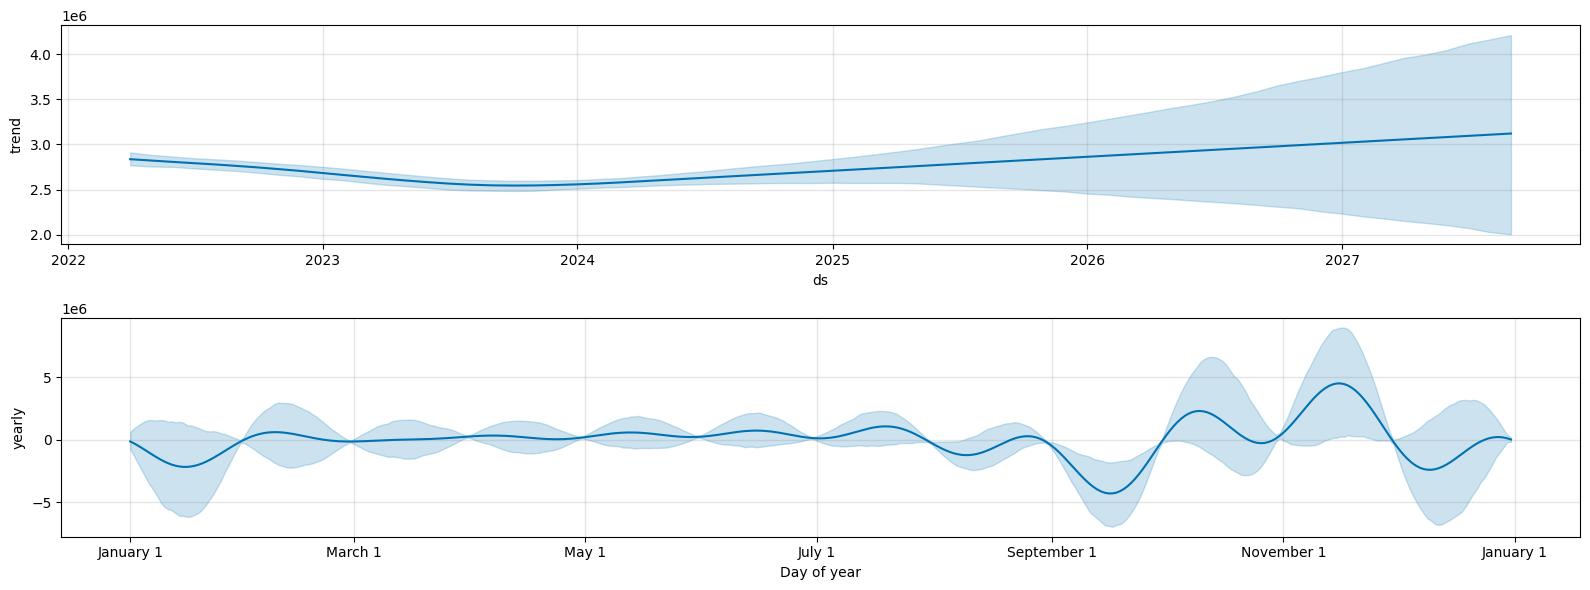

In [27]:
components = prophet_1.plot_components(forecast_pre, figsize=(16,6))

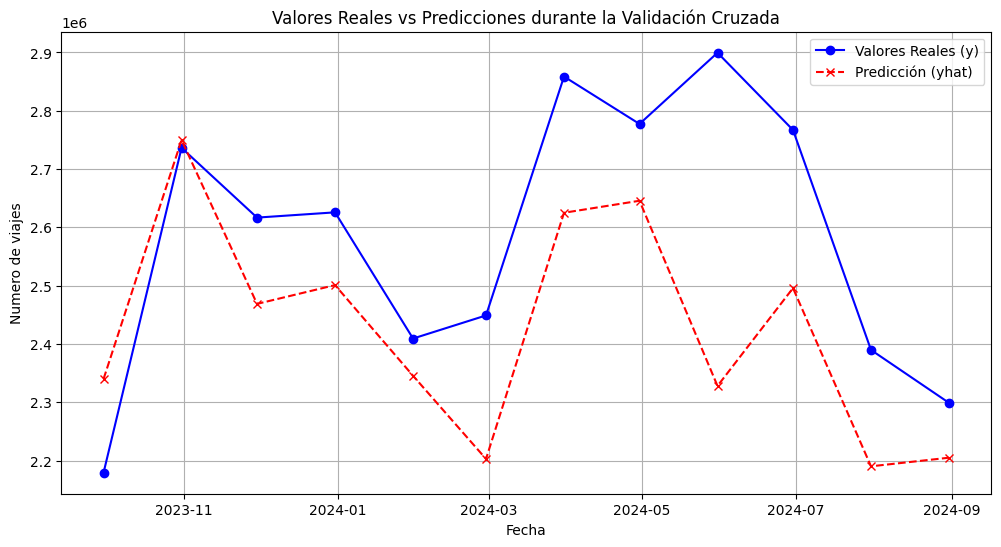

In [28]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_pre['ds'], df_cv_pre['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_pre['ds'], df_cv_pre['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()

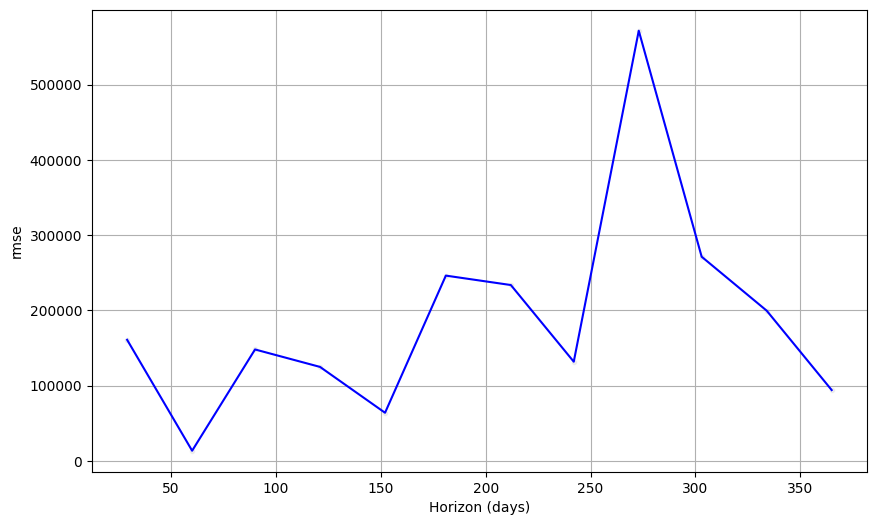

In [29]:
fig = plot_cross_validation_metric(df_cv_pre, metric='rmse')

In [30]:
df_p_pre.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,12,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,196 days 20:00:00,5.407506e+10,188215.281076,188215.281076,0.071536,0.071536,0.075000,0.916667
std,109 days 20:33:46.987269072,8.894202e+10,142637.750047,142637.750047,0.048939,0.048939,0.054479,0.288675
min,29 days 00:00:00,1.803947e+08,13431.109257,13431.109257,0.004908,0.004908,0.004896,0.000000
25%,113 days 06:00:00,1.388874e+10,117096.557601,117096.557601,0.045796,0.045796,0.046874,1.000000
50%,196 days 12:00:00,2.387904e+10,154395.406214,154395.406214,0.065172,0.065172,0.064682,1.000000
75%,280 days 12:00:00,5.606548e+10,236719.371695,236719.371695,0.087128,0.087128,0.091119,1.000000
max,365 days 00:00:00,3.266185e+11,571505.479077,571505.479077,0.197102,0.197102,0.218650,1.000000
